In [15]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata

In [3]:
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15) # umap only used for the visualization, does not have an effect on the annotation with 'score_genes'

In [4]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_endoSplit_portalLAM.csv"

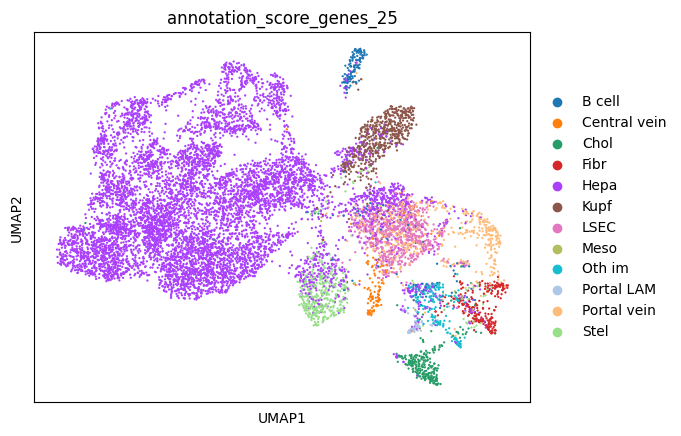

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
              annotation_score_genes_25
B cell                         1.807980
Central vein                   0.970787
Chol                           2.377984
Fibr                           2.048450
Hepa                          70.422159
Kupf                           5.049875
LSEC                           6.706448
Meso                           0.062344
Oth im                         1.585322
Portal LAM                     0.614535
Portal vein                    4.613466
Stel                           3.740648


In [5]:
# Original score_genes
mg_dict, scoresper_cluster = score_genes_bins(
    sdata = sdata,
    path_marker_genes = path_mg,
    bins = 25)
visualize_classification(sdata,'annotation_score_genes_25','umap_23_15',path_mg,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

Hepa            0.641610
LSEC            0.124688
Stel            0.062433
Kupf            0.049341
Fibr            0.023335
Chol            0.022533
Oth im          0.017724
Portal vein     0.016922
B cell          0.015319
Portal LAM      0.011845
Unknown         0.005433
Central vein    0.004988
Meso            0.003830
Name: annotation_own_score_genes, dtype: float64


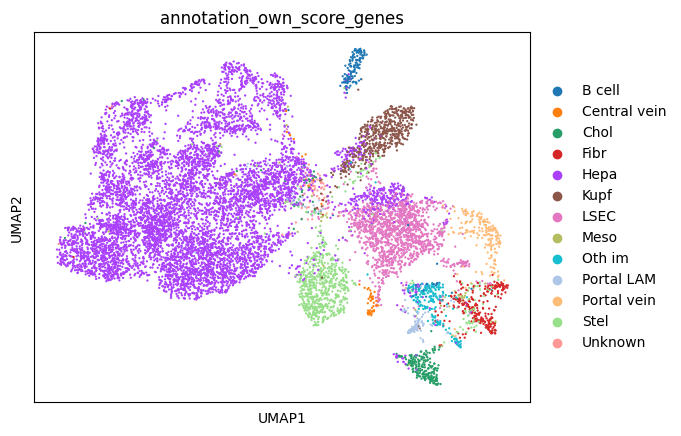

0.051656572853580336


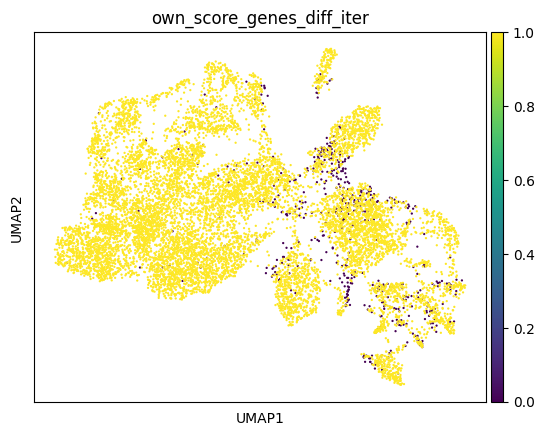

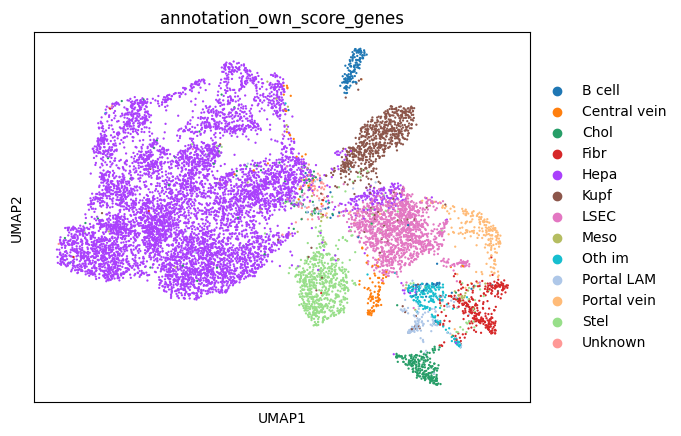

Hepa            0.617029
LSEC            0.119523
Kupf            0.063146
Stel            0.059672
Fibr            0.027699
Chol            0.026630
Portal vein     0.018436
B cell          0.017189
Oth im          0.016922
Portal LAM      0.014428
Central vein    0.009975
Unknown         0.005433
Meso            0.003919
Name: annotation_own_score_genes, dtype: float64
0.008550053437833986


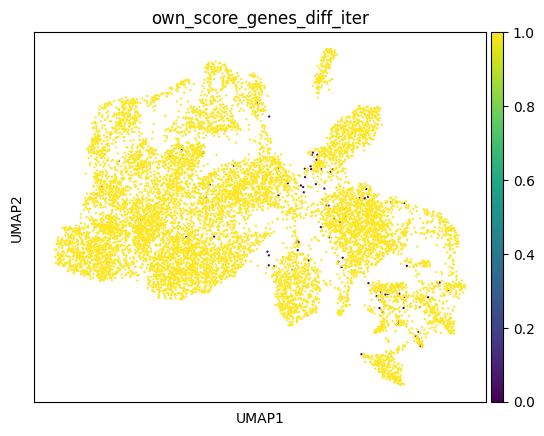

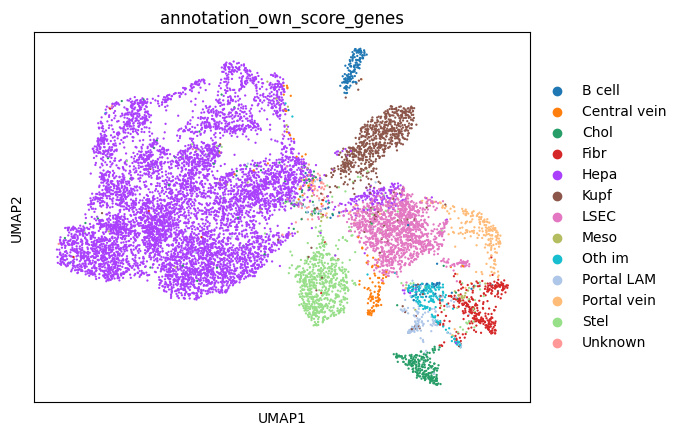

Hepa            0.613199
LSEC            0.118454
Kupf            0.065105
Stel            0.060652
Fibr            0.028589
Chol            0.026808
Portal vein     0.018881
B cell          0.017367
Oth im          0.015497
Portal LAM      0.015408
Central vein    0.010509
Unknown         0.005433
Meso            0.004097
Name: annotation_own_score_genes, dtype: float64
0.0017812611328820805


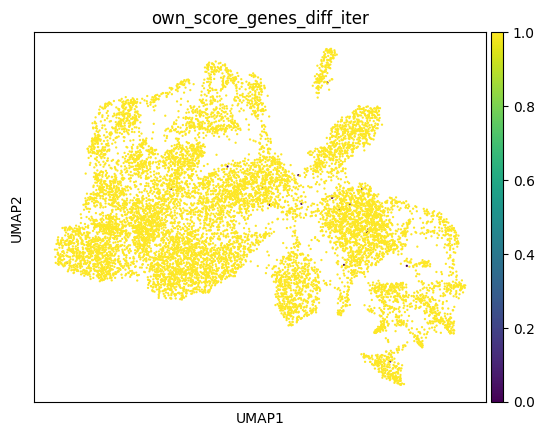

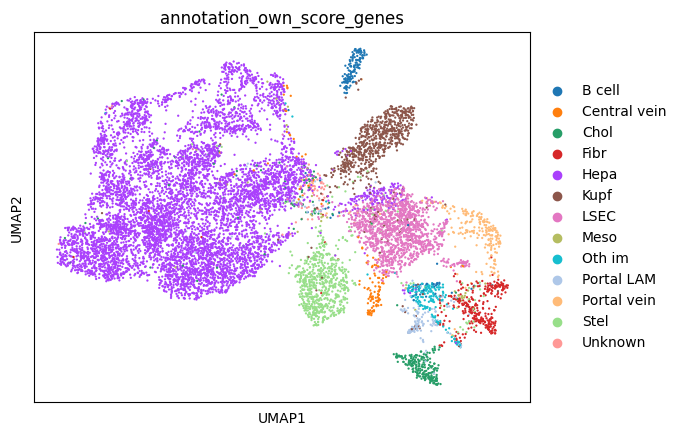

Hepa            0.612309
LSEC            0.118632
Kupf            0.065550
Stel            0.060741
Fibr            0.028589
Chol            0.026808
Portal vein     0.018970
B cell          0.017278
Portal LAM      0.015586
Oth im          0.015408
Central vein    0.010599
Unknown         0.005433
Meso            0.004097
Name: annotation_own_score_genes, dtype: float64
0.00017812611328820805


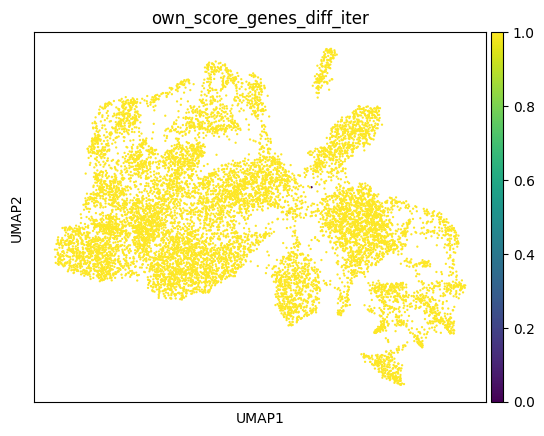

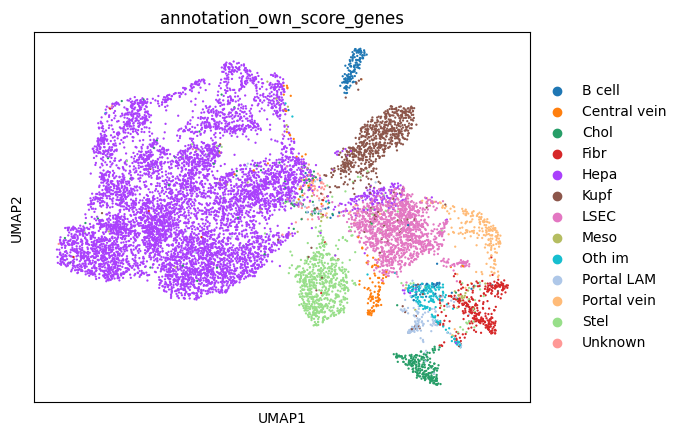

Hepa            0.612309
LSEC            0.118632
Kupf            0.065639
Stel            0.060563
Fibr            0.028589
Chol            0.026808
Portal vein     0.018970
B cell          0.017278
Portal LAM      0.015675
Oth im          0.015408
Central vein    0.010599
Unknown         0.005433
Meso            0.004097
Name: annotation_own_score_genes, dtype: float64
8.906305664410402e-05


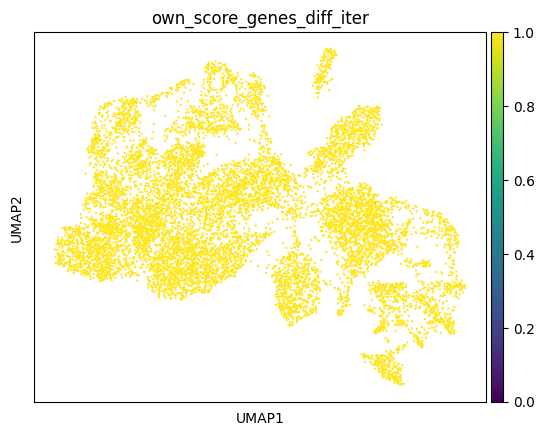

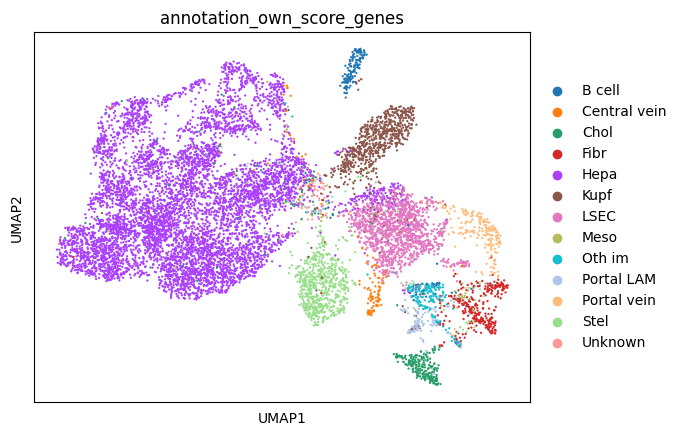

Hepa            0.612309
LSEC            0.118632
Kupf            0.065729
Stel            0.060474
Fibr            0.028589
Chol            0.026808
Portal vein     0.018970
B cell          0.017278
Portal LAM      0.015675
Oth im          0.015408
Central vein    0.010599
Unknown         0.005433
Meso            0.004097
Name: annotation_own_score_genes, dtype: float64
converged


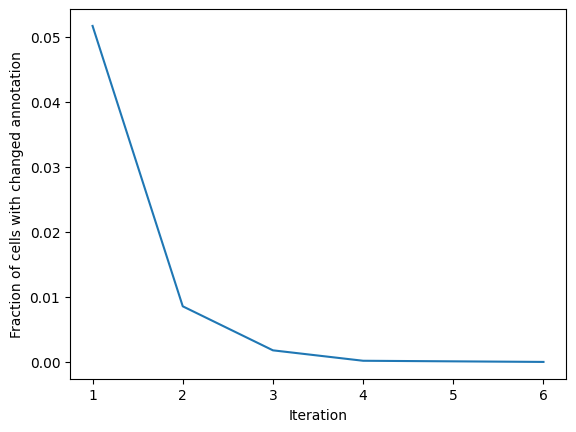

In [16]:
# Own score genes iterative
scores = own_score_genes_iterative(sdata.table,path_mg,nr_iterations=8)

Hepa             8.669
LSEC             9.333
Portal vein      6.000
Central vein     8.500
Chol             7.500
Kupf            19.500
Stel            16.001
Fibr            17.625
B cell           4.500
Meso             6.000
Portal LAM      13.500
Oth im           4.000
dtype: float64


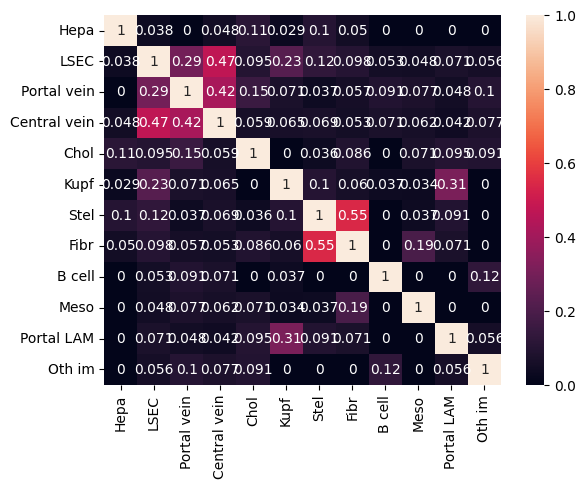

In [12]:
Jaccard_similarity_matrix(path_mg)

<AxesSubplot: >

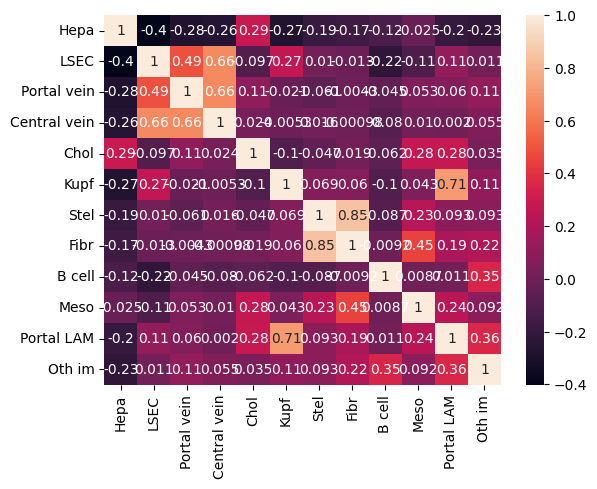

In [17]:
# plot correlation matrix of the features
sns.heatmap(scores.corr(method='pearson'), annot=True)
# sns.heatmap(scores_minmax.corr(method='pearson'), annot=True) gives the same heatmap

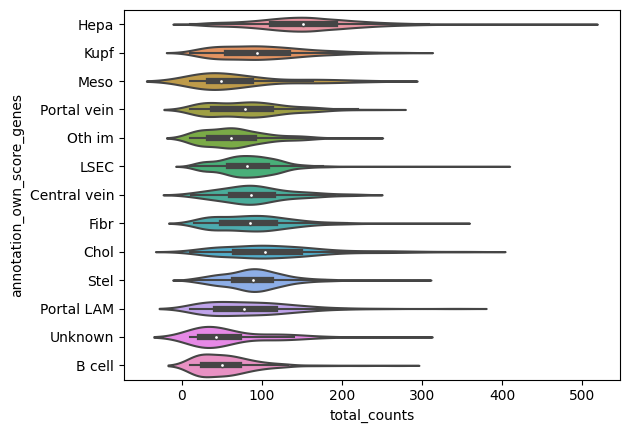

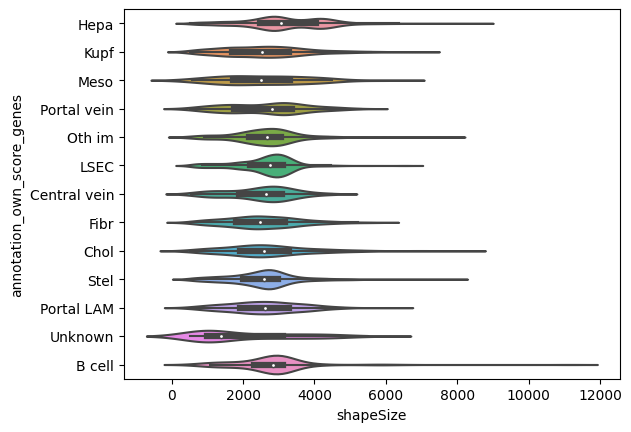

<AxesSubplot: xlabel='count_density', ylabel='annotation_own_score_genes'>

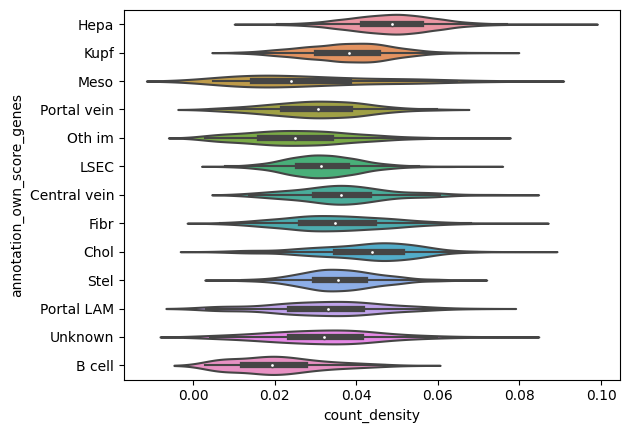

In [18]:
sns.violinplot(data=sdata.table.obs,x="total_counts",y="annotation_own_score_genes")
plt.show()
sns.violinplot(data=sdata.table.obs,x="shapeSize",y="annotation_own_score_genes")
plt.show()
sdata.table.obs['count_density'] = sdata.table.obs['total_counts'] / sdata.table.obs['shapeSize']
sns.violinplot(data=sdata.table.obs,x="count_density",y="annotation_own_score_genes")

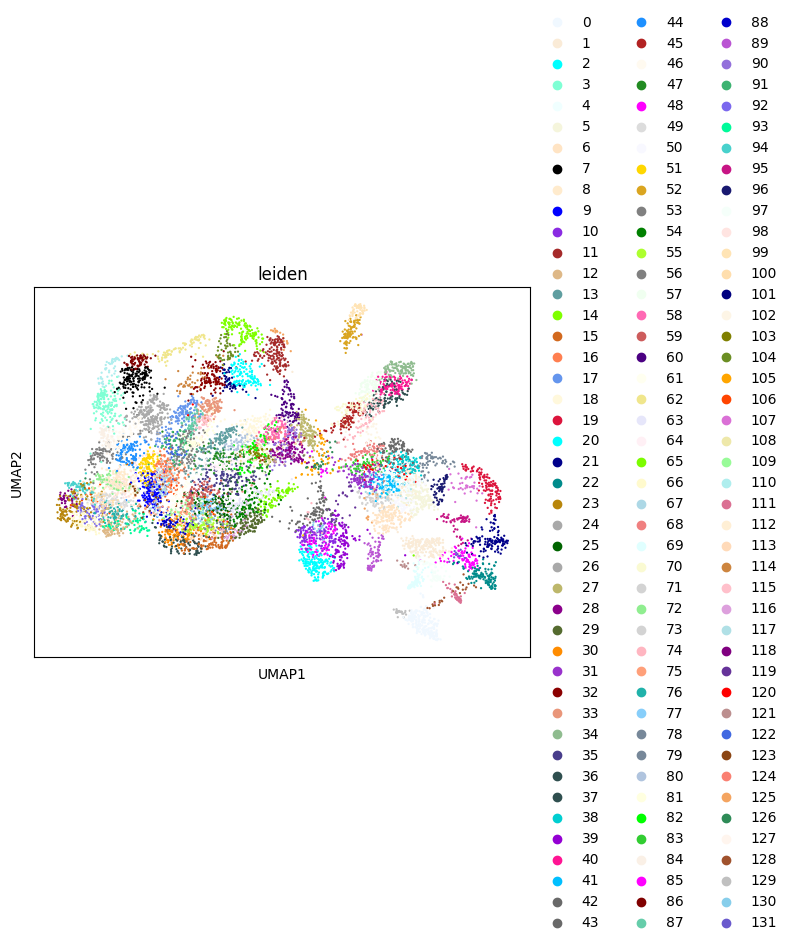

In [19]:
sc.tl.leiden(sdata.table,resolution=10,key_added='leiden')
sc.pl.umap(sdata.table,color='leiden',palette=list(matplotlib.colors.CSS4_COLORS.values()))

Index(['B cell', 'Central vein', 'Chol', 'Fibr', 'Hepa', 'Kupf', 'LSEC',
       'Meso', 'Oth im', 'Portal LAM', 'Portal vein', 'Stel', 'Unknown'],
      dtype='object')
Hepa
[3, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 20, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 35, 36, 44, 46, 47, 49, 51, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 72, 73, 75, 76, 77, 79, 80, 81, 82, 84, 86, 87, 88, 90, 91, 92, 93, 94, 98, 100, 101, 103, 104, 106, 108, 109, 110, 113, 114, 115, 116, 118, 122, 123, 124, 127]
Kupf
[34, 37, 40, 45, 57, 70, 74, 102]
LSEC
[4, 5, 6, 31, 38, 41, 43, 50, 71, 78, 83, 95, 96, 112, 117, 120]
Central vein
[89]
Portal vein
[19, 107]
Fibr
[21, 22, 48, 128, 131]
Stel
[2, 10, 39, 42, 85, 119, 130]
Meso
[]
Chol
[0, 129]
B cell
[52, 99]
Oth im
[1, 97]
Unknown
[105, 111, 121, 125, 126]
Portal LAM
[69]


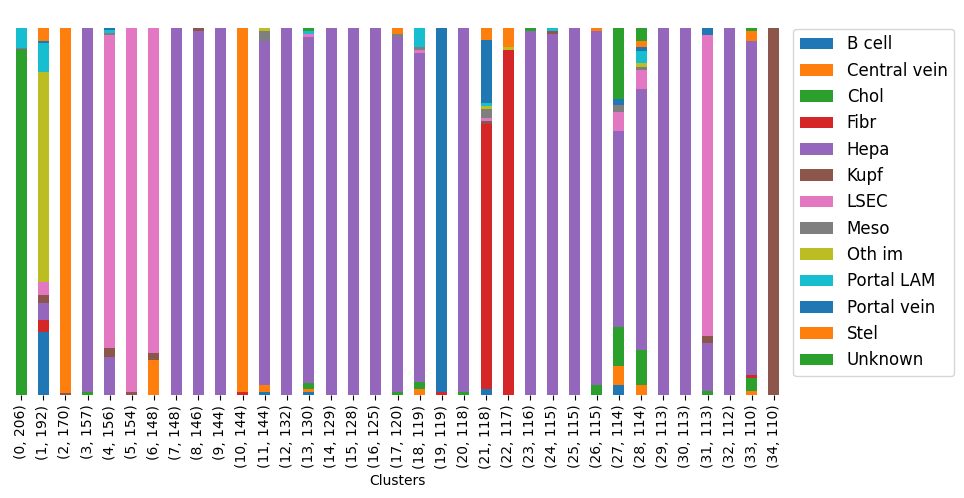

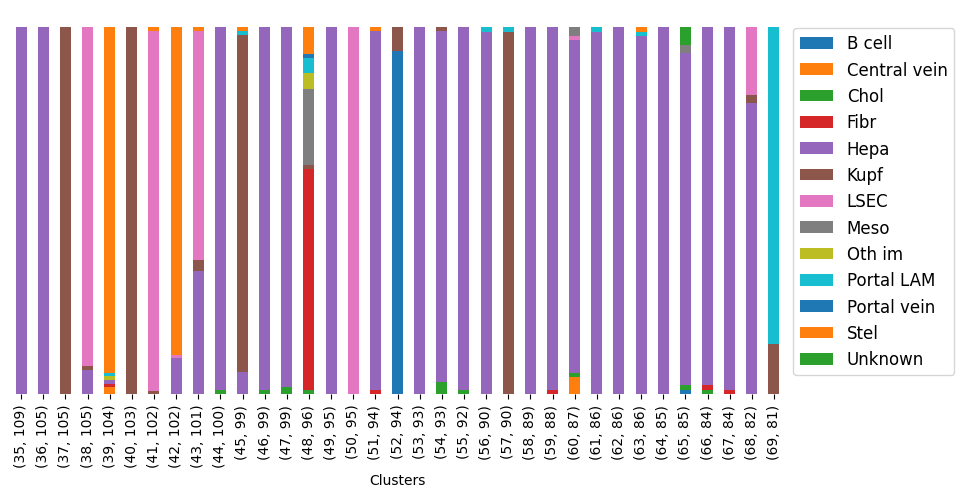

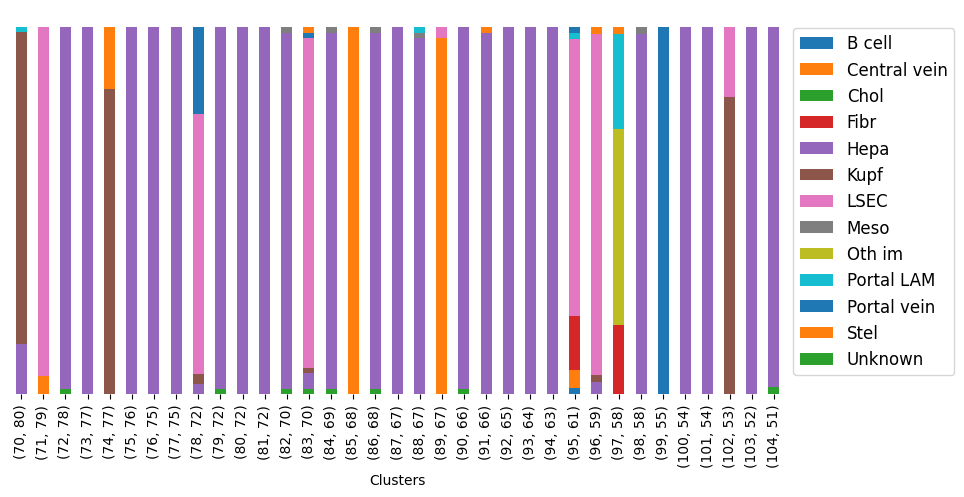

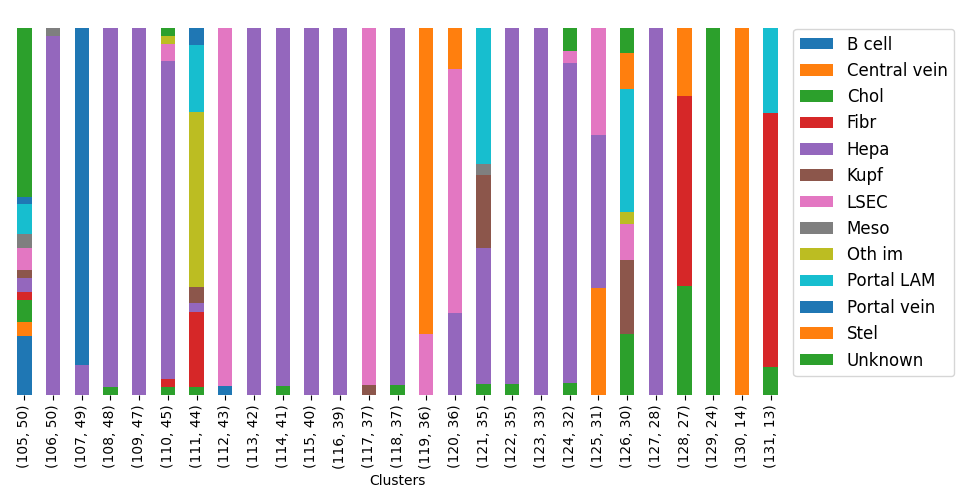

In [23]:
cell_types = ['Hepa','Kupf','LSEC','Central vein','Portal vein','Fibr','Stel','Meso','Chol','B cell','Oth im','Unknown','Portal LAM']
leiden_clusters_per_ct = clusteringVSleiden(sdata.table, "annotation_own_score_genes", "leiden",cell_types)

In [24]:
a = sdata.table.obs['leiden']
i = 0
for putative_leiden_clusters in leiden_clusters_per_ct:
    L = [str(x) for x in putative_leiden_clusters]
    for n in L:
        a = a.replace(n,cell_types[i])
    i += 1
sdata.table.obs['leiden_cell_types'] = a
print(sdata.table.obs['leiden_cell_types'].value_counts())


Hepa            6936
LSEC            1431
Kupf             717
Stel             638
Fibr             371
Oth im           250
Chol             230
Unknown          190
Portal vein      168
B cell           149
Portal LAM        81
Central vein      67
Name: leiden_cell_types, dtype: int64


67
Summary:
Hepa
Maybe drop:[['Glul', 'Central vein']]
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Plpp1', 'Central vein'], ['Fn1', 'Chol']]
Stel
Maybe drop:[['Fn1', 'Hepa'], ['Plpp1', 'Central vein'], ['Axl', 'Fibr']]
Kupf
Maybe drop:[['Cd36', 'LSEC'], ['Plpp1', 'Central vein'], ['Pecam1', 'B cell'], ['Fcgr1', 'Portal LAM'], ['C5ar1', 'Portal LAM']]
LSEC
Maybe drop:[['Sirpa', 'Kupf'], ['Sirpa', 'Portal LAM']]
Portal vein
Maybe drop:[['Plpp1', 'Central vein'], ['Flt4', 'Central vein']]
Oth im
Maybe drop:[['Cd9', 'Portal vein']]
Portal LAM
Maybe drop:[['Cd9', 'Portal vein'], ['Spp1', 'Chol']]
B cell
Maybe drop:[['Itgb7', 'Oth im']]
Summary:
Hepa
Maybe drop:[['Glul', 'Central vein']]
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Plpp1', 'Central vein'], ['Fn1', 'Stel'], ['Fn1', 'Chol']]
Chol
Maybe drop:[['Fn1', 'Hepa']]
Kupf
Maybe drop:[['Cd36', 'LSEC'], ['Plpp1', 'Central vein'], ['Plpp1', 'Portal vein'], ['Pecam1', 'B cell'], ['Fcgr1', 'Portal LAM'], ['C5ar1', 'Portal LAM']]
LSEC
Maybe drop:[['Sirpa', '

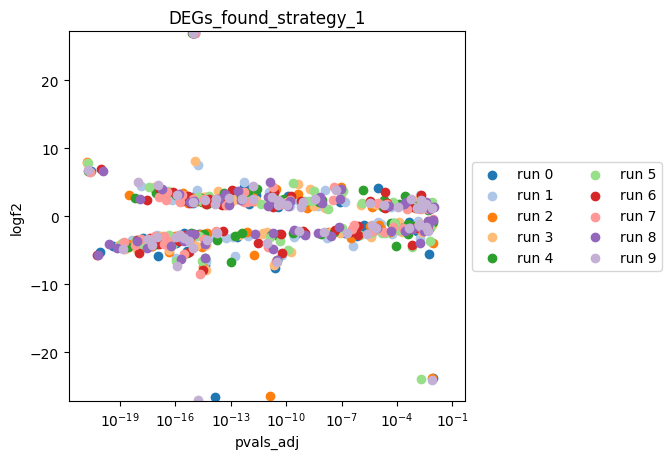

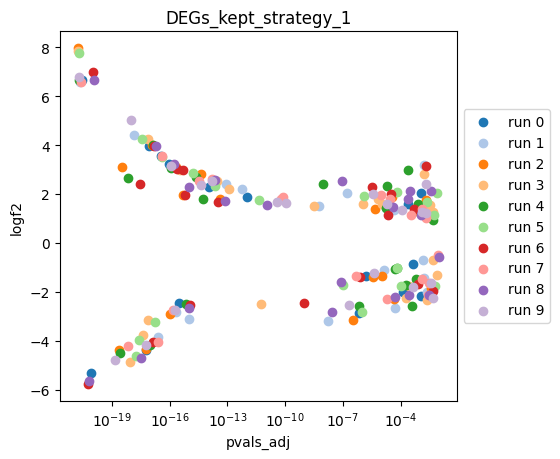

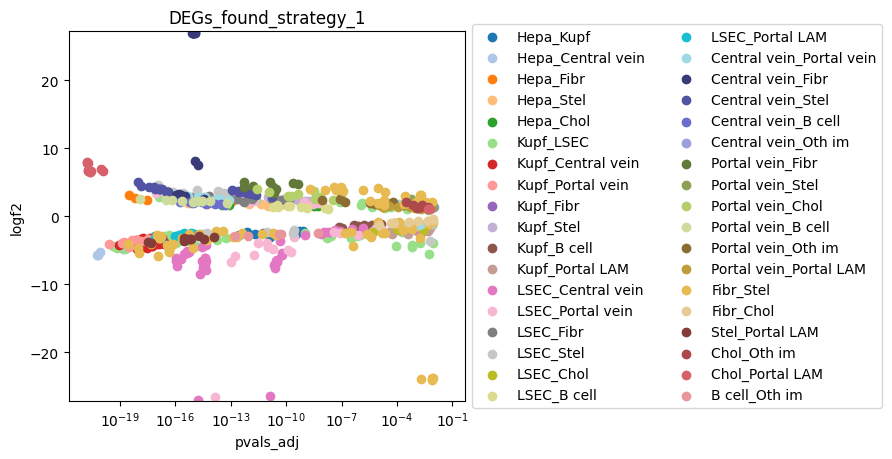

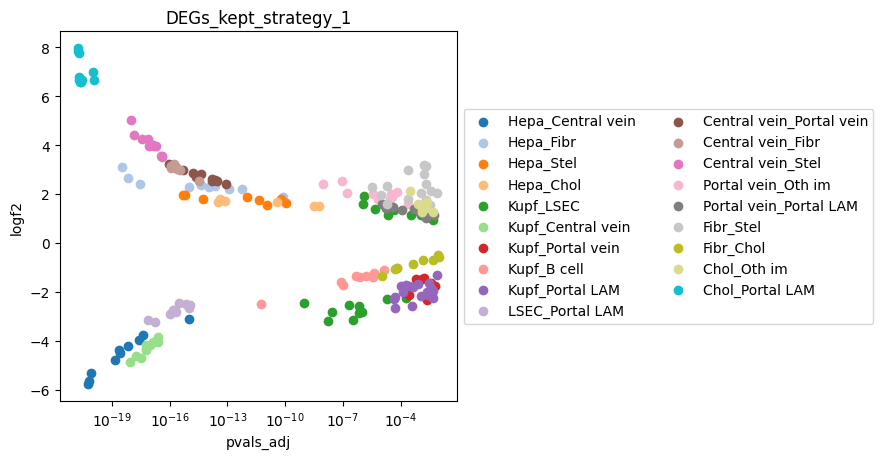

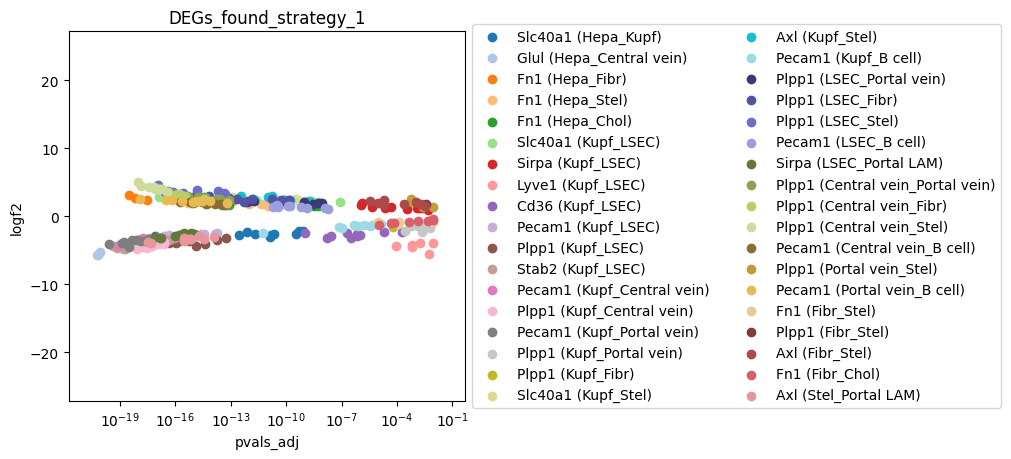

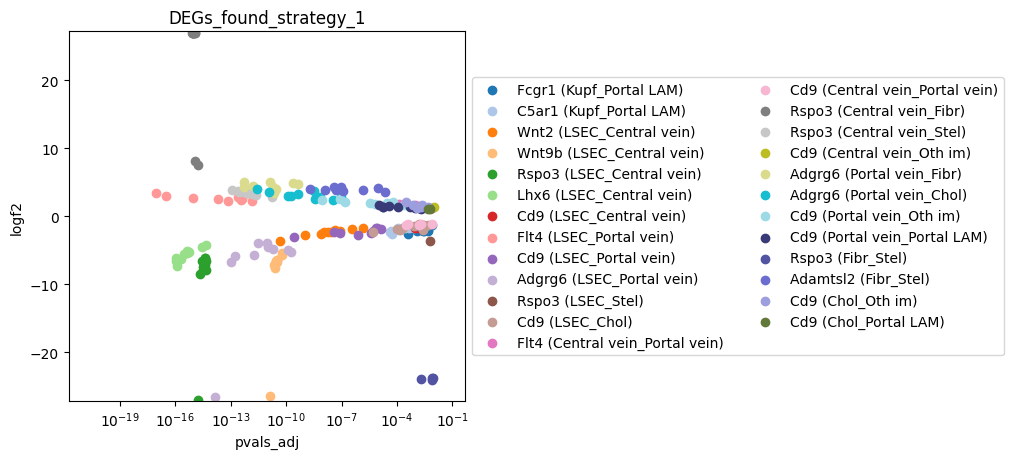

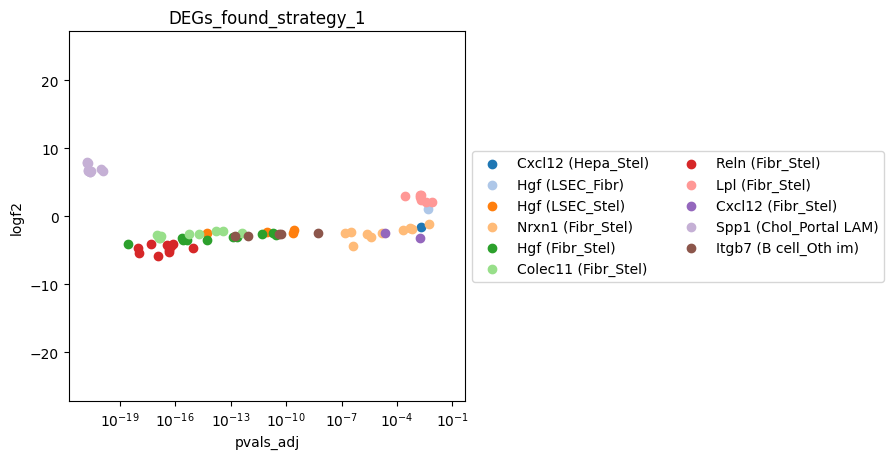

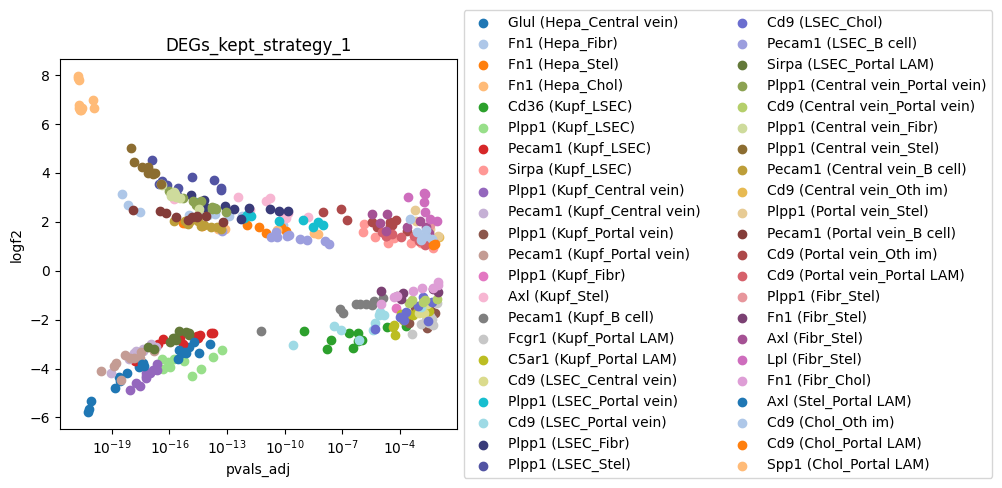

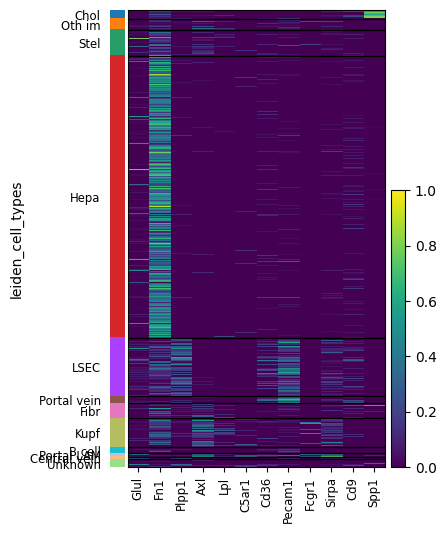

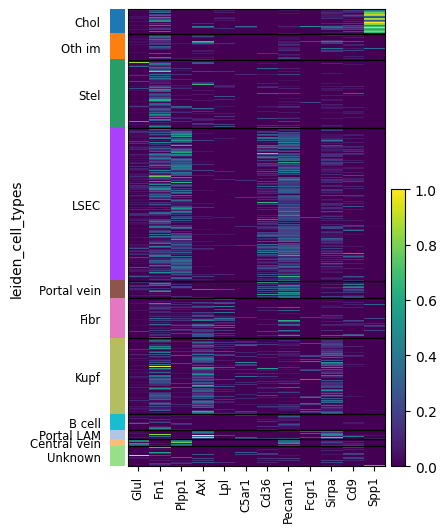

In [25]:
# STRATEGY 1 to change the marker gene list
results_strat1_10, results_runs1_10, DEG_details_runs1_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters_per_ct,path_mg,10,1)

In [26]:
# Update marker gene list based on STRATEGY 1:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified1.csv")

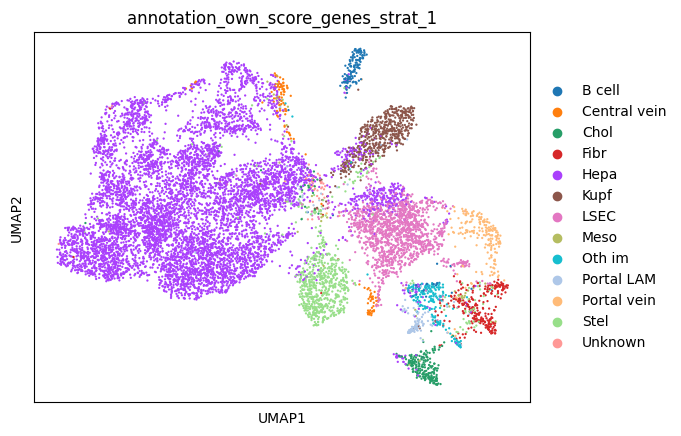

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
              annotation_own_score_genes_strat_1
B cell                                  1.549697
Central vein                            1.086569
Chol                                    2.119701
Fibr                                    2.422515
Hepa                                   63.760242
Kupf                                    4.853937
LSEC                                   12.451015
Meso                                    0.480941
Oth im                                  1.674385
Portal LAM                              1.211258
Portal vein                             1.781261
Stel                                    6.278945
Unknown                                 0.329533


In [27]:
# Own score genes with modified marker gene list based on STRATREGY 1
path_mg_mod1 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified1.csv"
scores = own_score_genes(sdata.table,path_mg_mod1,suffix='_strat_1')
visualize_classification(sdata,'annotation_own_score_genes_strat_1','umap_23_15',path_mg_mod1,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

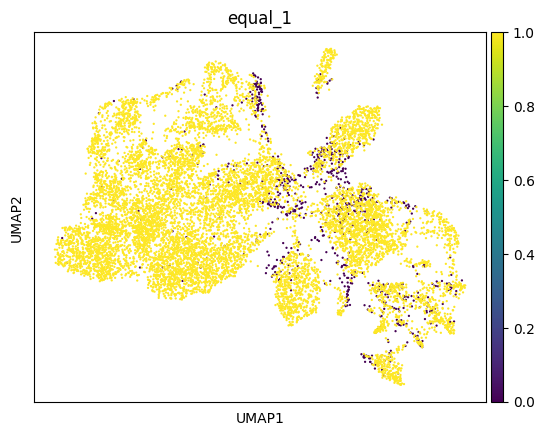

In [28]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_1'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_1'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_1'])

Hepa             8.002
LSEC             8.333
Portal vein      5.500
Central vein     8.500
Chol             6.500
Kupf            16.000
Stel            13.501
Fibr            16.125
B cell           4.500
Meso             6.000
Portal LAM      11.500
Oth im           3.000
dtype: float64


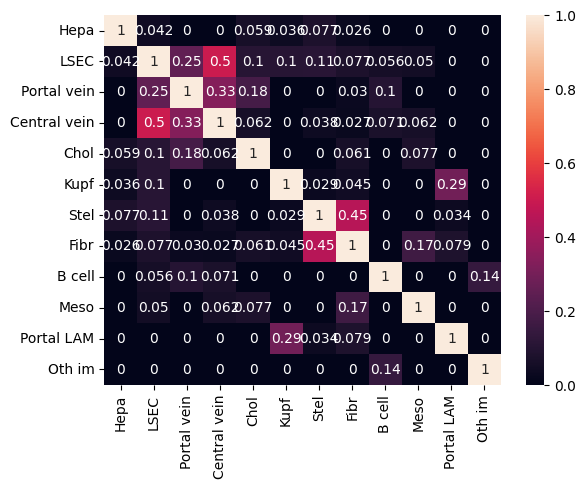

In [29]:
Jaccard_similarity_matrix(path_mg_mod1)

67
Ccr2
Is marker gene of: ['Portal LAM']
Could also be a marker gene of: ['Oth im']
Cd36
Is marker gene of: ['LSEC', 'Kupf']
Could also be a marker gene of: ['Portal vein']
Cd3e
Is marker gene of: []
Could also be a marker gene of: ['Oth im']
Clec10a
Is marker gene of: []
Could also be a marker gene of: ['Portal LAM']
Clec9a
Is marker gene of: []
Could also be a marker gene of: ['Kupf']
Col1a1
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Portal LAM']
Cyp2e1
Is marker gene of: ['Hepa']
Could also be a marker gene of: ['Kupf', 'Central vein', 'Stel']
Dpt
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Chol', 'Portal LAM']
F13a1
Is marker gene of: []
Could also be a marker gene of: ['Portal LAM']
Lilra5
Is marker gene of: ['Kupf']
Could also be a marker gene of: ['Portal LAM']
Mgl2
Is marker gene of: []
Could also be a marker gene of: ['Portal LAM']
Myh11
Is marker gene of: ['Stel']
Could also be a marker gene of: ['Portal vein', 'Fibr']
Ngfr
Is marker gene

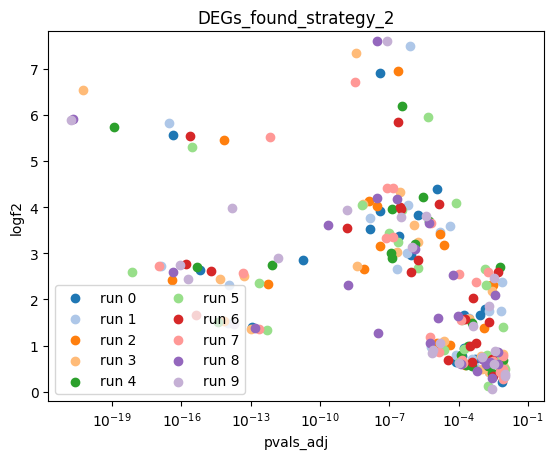

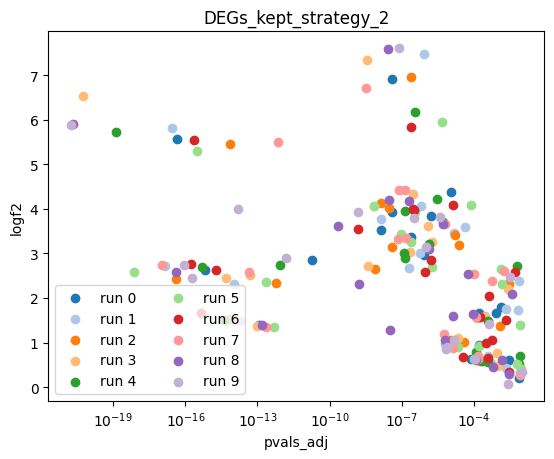

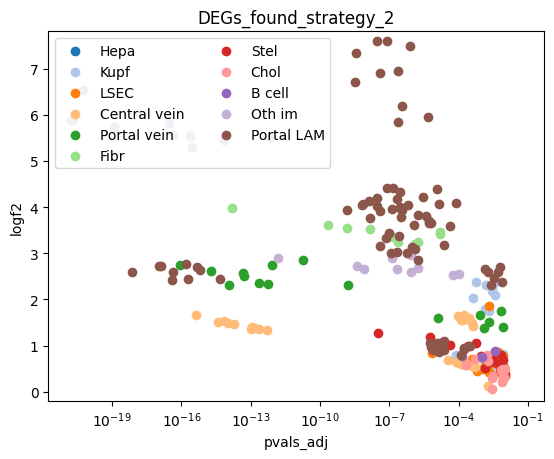

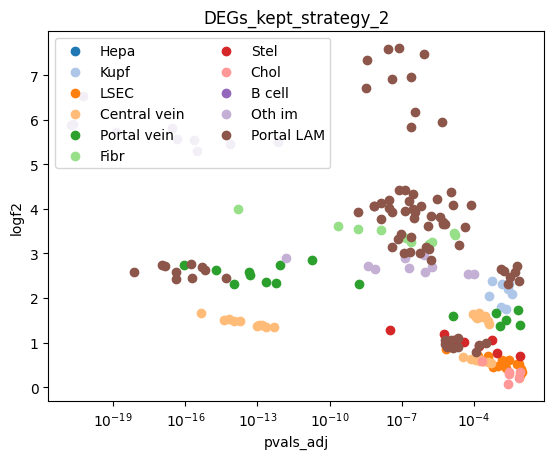

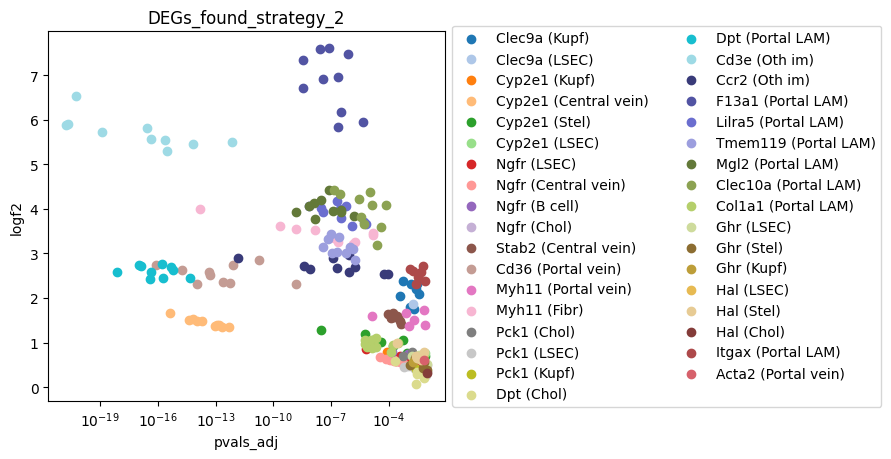

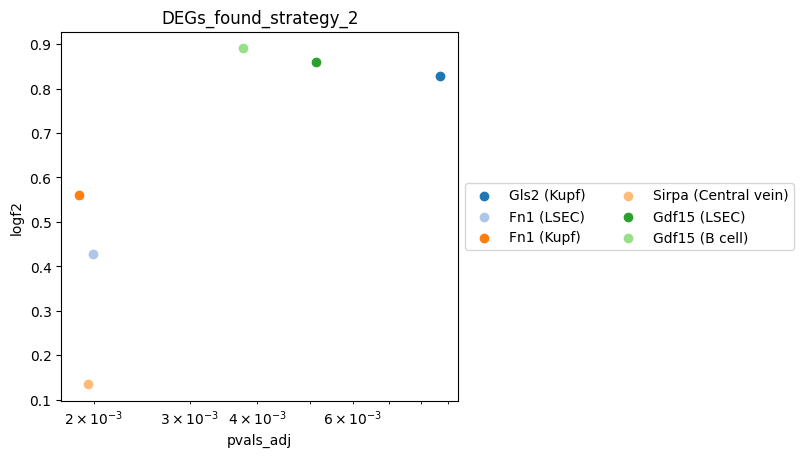

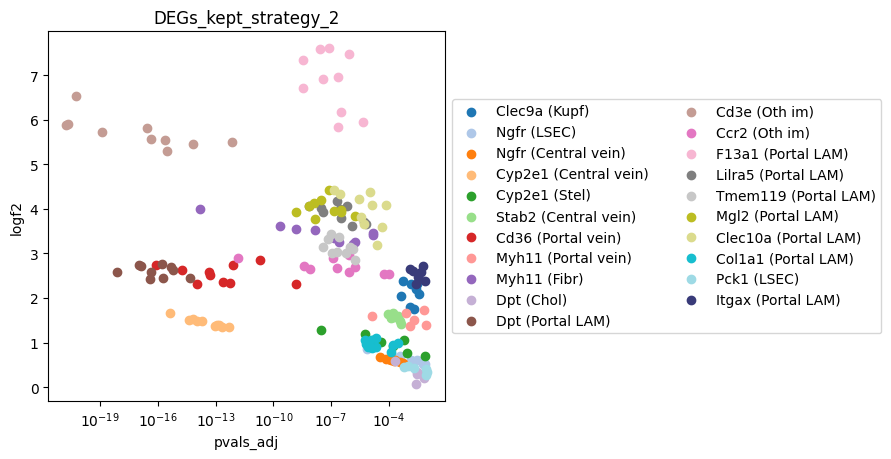

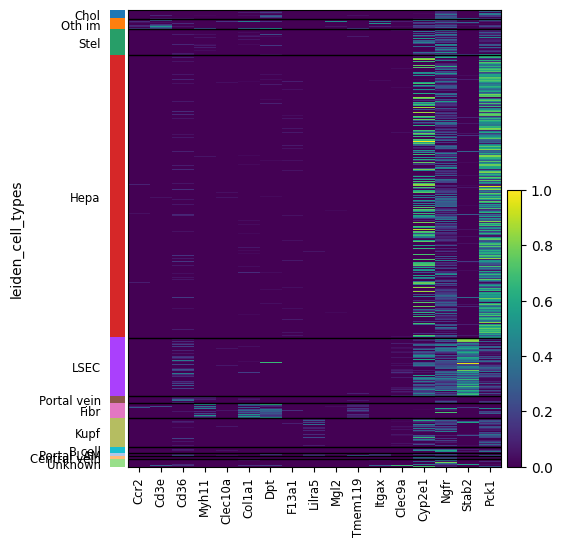

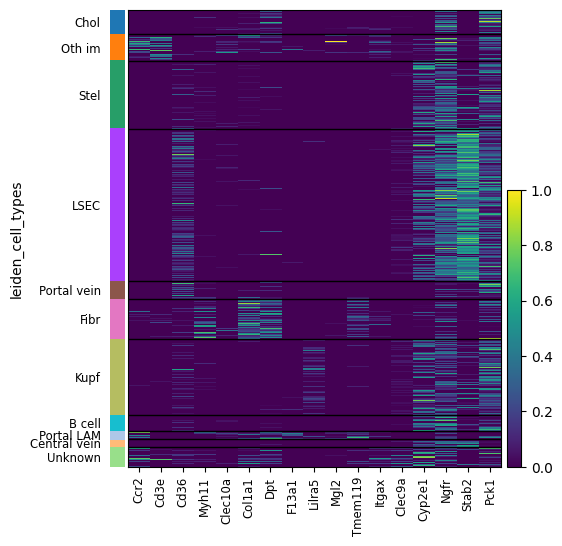

In [30]:
# STRATEGY 2 to change the marker gene list
results_strat2_10, results_runs2_10, DEG_details_runs2_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters_per_ct,path_mg,10,2)

In [31]:
# Update marker gene list based on STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 1
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified2.csv")

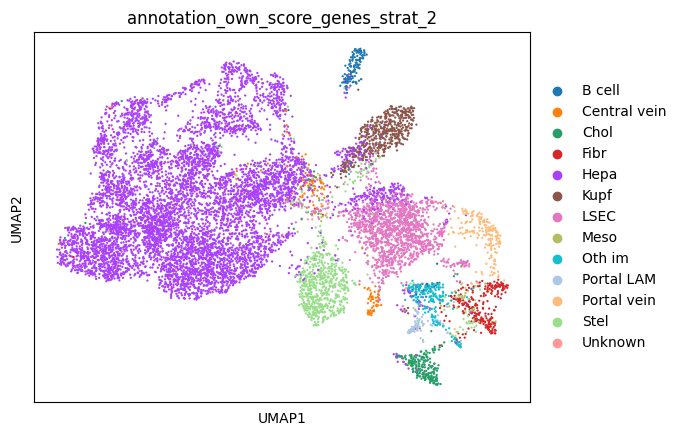

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
              annotation_own_score_genes_strat_2
B cell                                  1.514072
Central vein                            1.300321
Chol                                    2.173139
Fibr                                    2.333452
Hepa                                   63.591022
Kupf                                    4.711436
LSEC                                   13.056644
Meso                                    0.338440
Oth im                                  1.861418
Portal LAM                              0.890631
Portal vein                             1.834699
Stel                                    6.341290
Unknown                                 0.053438


In [32]:
# Own score genes with modified marker gene list based on STRATREGY 2
path_mg_mod2 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified2.csv"
scores = own_score_genes(sdata.table,path_mg_mod2,suffix='_strat_2')
visualize_classification(sdata,'annotation_own_score_genes_strat_2','umap_23_15',path_mg_mod2,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

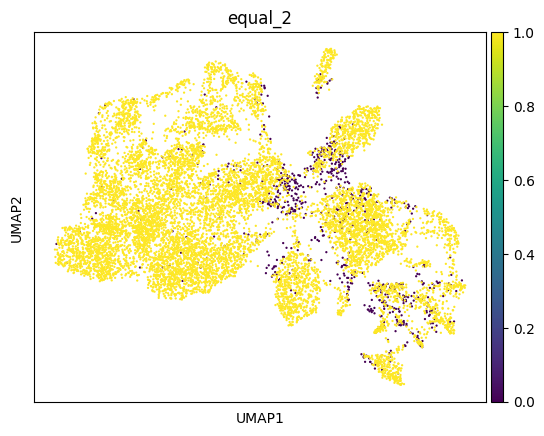

In [33]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_2'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_2'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_2'])

Hepa             8.669
LSEC            11.333
Portal vein      8.000
Central vein    11.500
Chol             8.500
Kupf            20.500
Stel            17.001
Fibr            18.625
B cell           4.500
Meso             6.000
Portal LAM      21.500
Oth im           6.000
dtype: float64


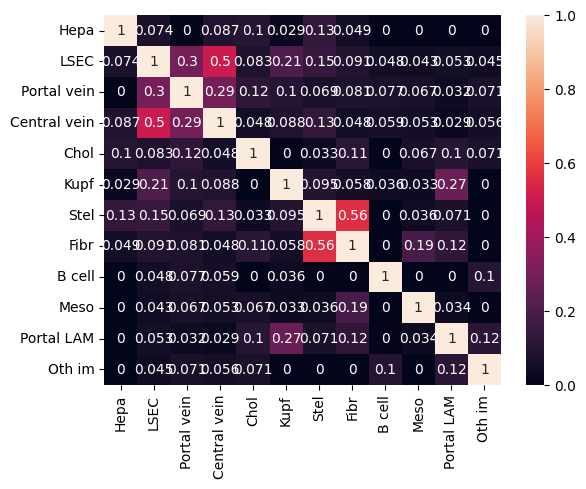

In [34]:
Jaccard_similarity_matrix(path_mg_mod2)

In [35]:
# STRATEGY 1 and STRATEGY 2 combined to change the marker gene list

In [36]:
# Update marker gene list based on STRATEGY 1 and STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 1
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified_1_2.csv")

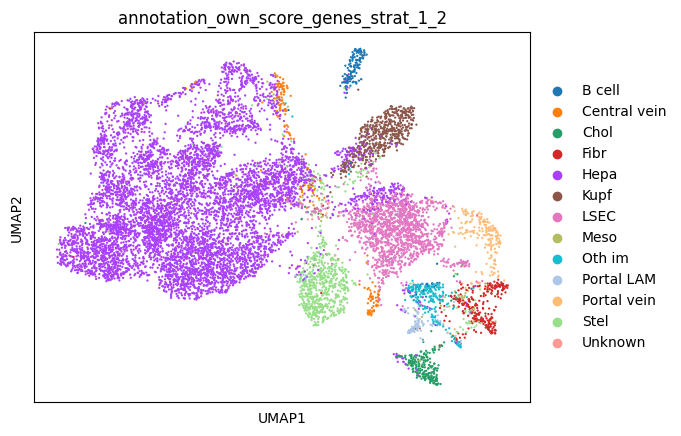

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
              annotation_own_score_genes_strat_1_2
B cell                                    1.540791
Central vein                              1.656573
Chol                                      2.084076
Fibr                                      2.369077
Hepa                                     63.021019
Kupf                                      4.818311
LSEC                                     13.252583
Meso                                      0.409690
Oth im                                    1.834699
Portal LAM                                0.952975
Portal vein                               1.790167
Stel                                      6.234414
Unknown                                   0.035625


In [37]:
# Own score genes with modified marker gene list based on STRATREGY 1 and STRATEGY 2
path_mg_mod_1_2 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified_1_2.csv"
scores = own_score_genes(sdata.table,path_mg_mod_1_2,suffix='_strat_1_2')
visualize_classification(sdata,'annotation_own_score_genes_strat_1_2','umap_23_15',path_mg_mod_1_2,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

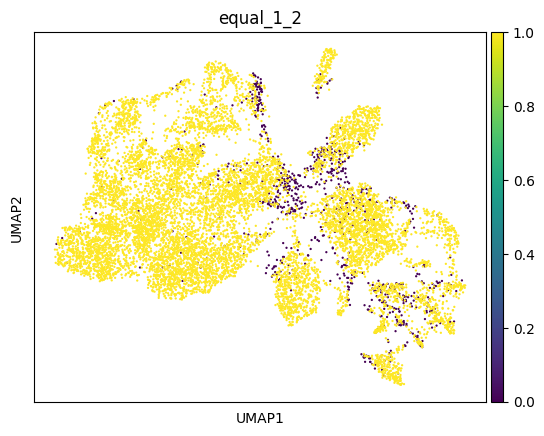

In [38]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_1_2'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_1_2'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_1_2'])

Hepa             8.002
LSEC            10.333
Portal vein      7.500
Central vein    11.500
Chol             7.500
Kupf            17.000
Stel            14.501
Fibr            17.125
B cell           4.500
Meso             6.000
Portal LAM      19.500
Oth im           5.000
dtype: float64


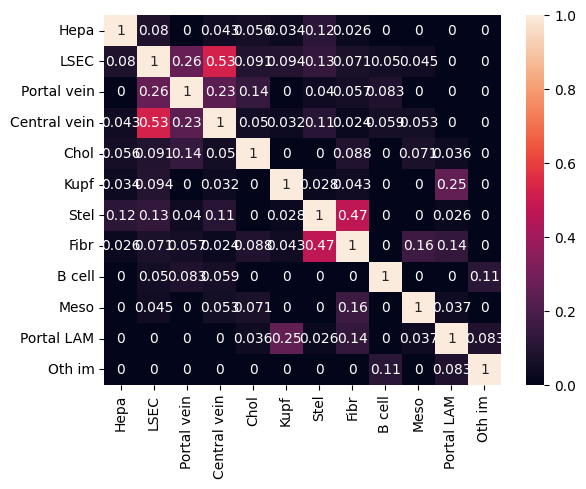

In [39]:
Jaccard_similarity_matrix(path_mg_mod_1_2)

Hepa            0.630210
LSEC            0.132526
Stel            0.062344
Kupf            0.048183
Fibr            0.023691
Chol            0.020841
Oth im          0.018347
Portal vein     0.017902
Central vein    0.016566
B cell          0.015408
Portal LAM      0.009530
Meso            0.004097
Unknown         0.000356
Name: annotation_own_score_genes, dtype: float64


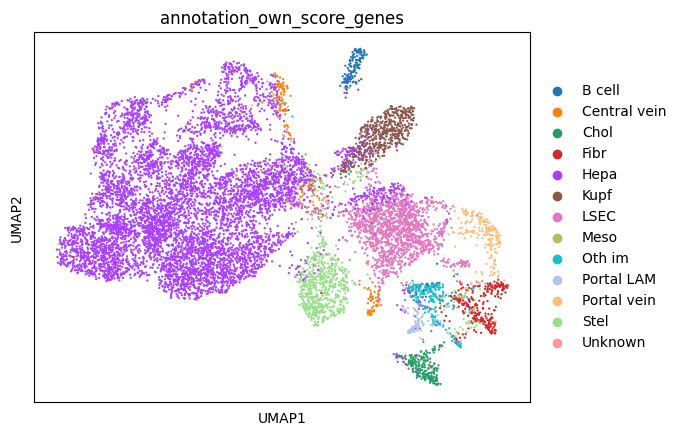

0.06528322052012825


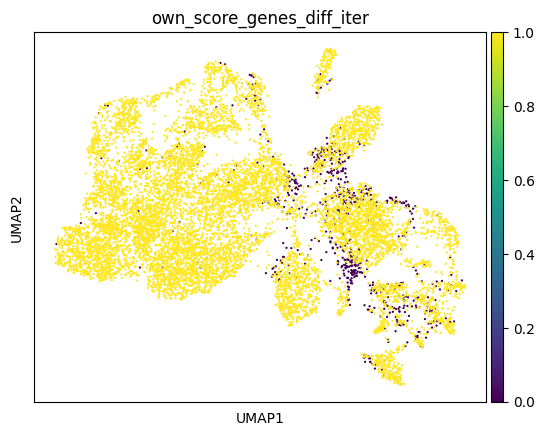

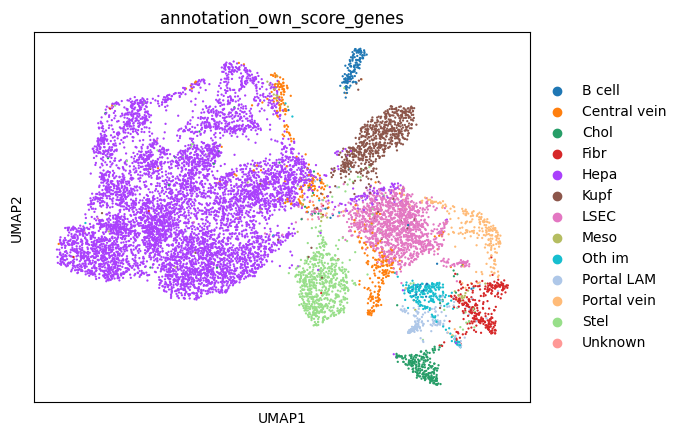

Hepa            0.603580
LSEC            0.118365
Kupf            0.060741
Stel            0.058871
Central vein    0.034200
Fibr            0.026541
Chol            0.022889
Portal vein     0.020841
Oth im          0.019861
B cell          0.014784
Portal LAM      0.014606
Meso            0.004364
Unknown         0.000356
Name: annotation_own_score_genes, dtype: float64
0.008460990381189882


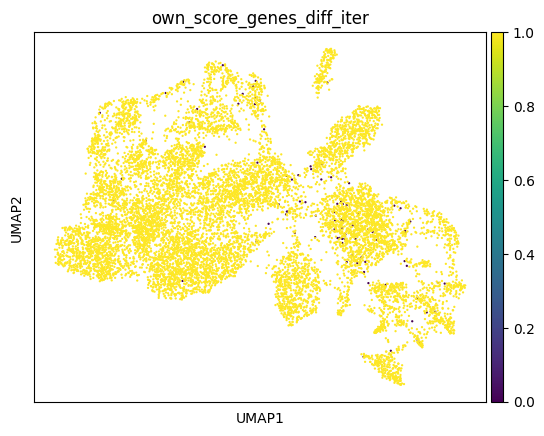

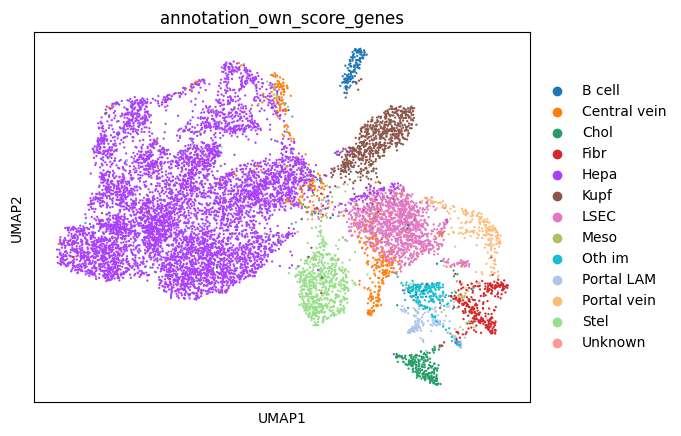

Hepa            0.601532
LSEC            0.114179
Kupf            0.061899
Stel            0.058960
Central vein    0.036427
Fibr            0.026897
Chol            0.023245
Portal vein     0.021197
Oth im          0.020039
Portal LAM      0.015319
B cell          0.014606
Meso            0.005344
Unknown         0.000356
Name: annotation_own_score_genes, dtype: float64
0.0016921980762379764


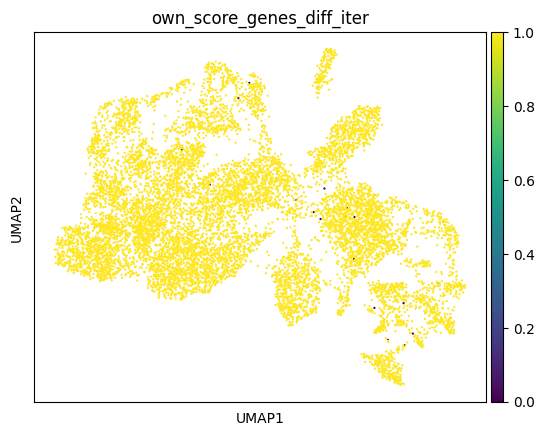

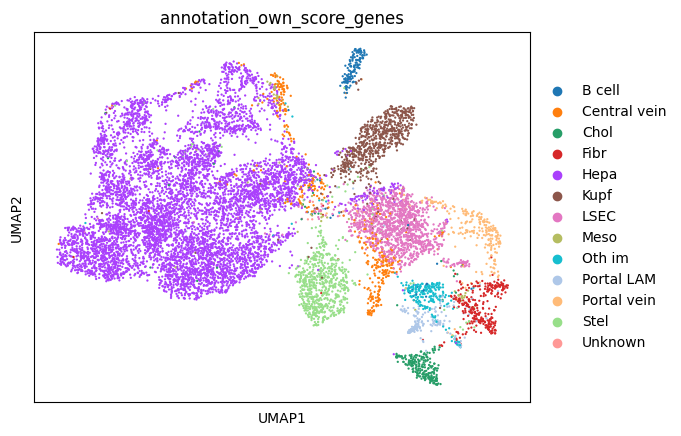

Hepa            0.601176
LSEC            0.113466
Kupf            0.062166
Stel            0.058871
Central vein    0.036694
Fibr            0.027164
Chol            0.023156
Portal vein     0.021108
Oth im          0.019861
Portal LAM      0.015675
B cell          0.014606
Meso            0.005700
Unknown         0.000356
Name: annotation_own_score_genes, dtype: float64
0.0008015675097969362


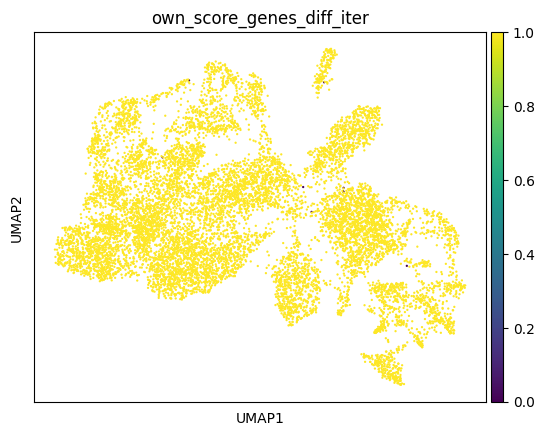

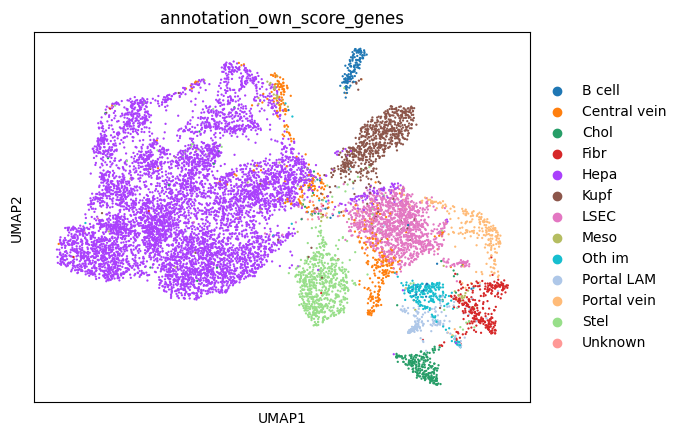

Hepa            0.601176
LSEC            0.113110
Kupf            0.062433
Stel            0.058871
Central vein    0.036694
Fibr            0.027164
Chol            0.023067
Portal vein     0.021019
Oth im          0.019861
Portal LAM      0.015675
B cell          0.014517
Meso            0.006056
Unknown         0.000356
Name: annotation_own_score_genes, dtype: float64
0.00017812611328820805


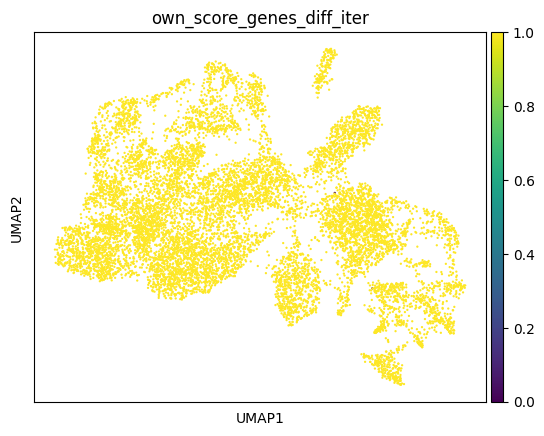

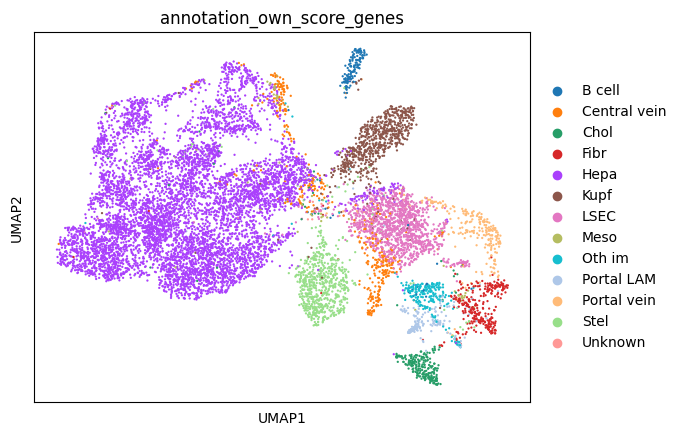

Hepa            0.601265
LSEC            0.113021
Kupf            0.062433
Stel            0.058871
Central vein    0.036694
Fibr            0.027164
Chol            0.023067
Portal vein     0.020930
Oth im          0.019950
Portal LAM      0.015675
B cell          0.014517
Meso            0.006056
Unknown         0.000356
Name: annotation_own_score_genes, dtype: float64
8.906305664410402e-05


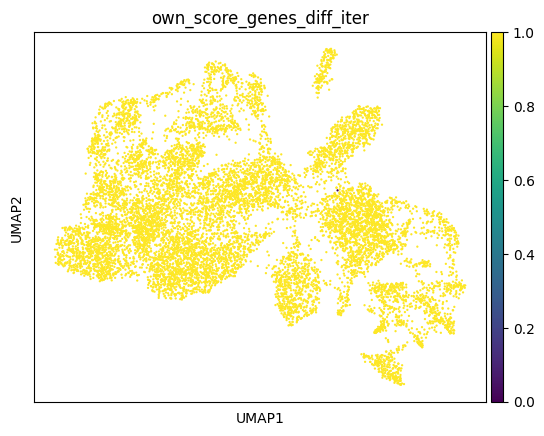

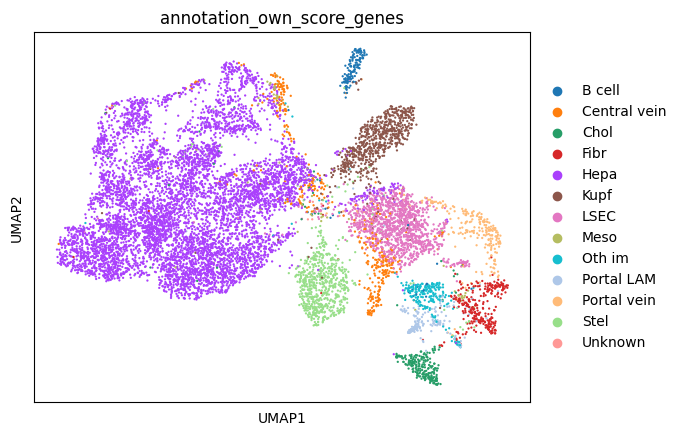

Hepa            0.601354
LSEC            0.112932
Kupf            0.062433
Stel            0.058871
Central vein    0.036694
Fibr            0.027164
Chol            0.023067
Portal vein     0.020930
Oth im          0.019950
Portal LAM      0.015675
B cell          0.014517
Meso            0.006056
Unknown         0.000356
Name: annotation_own_score_genes, dtype: float64
converged


Hepa      LSEC  Portal vein  Central vein      Chol       Kupf  \
0      8.259767 -1.887871    -2.920246     -3.508909 -1.891463  -4.565767   
1           NaN       NaN          NaN           NaN -2.445397  18.756601   
2           NaN       NaN          NaN           NaN       NaN  -4.373327   
3      0.818358       NaN          NaN     -3.250756 -1.568389        NaN   
4      2.039452 -2.596769          NaN     -2.977737 -2.776887        NaN   
...         ...       ...          ...           ...       ...        ...   
11223  3.747750 -0.538567          NaN     -3.782619 -3.002191        NaN   
11224  8.206864 -0.871264          NaN     -1.824165 -2.901204  -0.833461   
11225  4.345059       NaN          NaN           NaN -2.156565  -4.561060   
11226       NaN -0.789856          NaN     -3.571979       NaN  -1.072142   
11227  3.195111 -0.064240    -2.390610     -0.114645 -2.151737  43.681562   

            Stel       Fibr    B cell       Meso  Portal LAM  Oth im  
0            NaN  -6.968283       NaN        NaN   -6.514944     NaN  
1            NaN   7.967566       NaN  14.229142   43.986237     NaN  
2            NaN   7.811478       NaN  20.015069   -2.450540     NaN  
3      -4.341368  -0.747047       NaN   5.253900   -5.816654     NaN  
4      -4.464730        NaN       NaN        NaN         NaN     NaN  
...          ...        ...       ...        ...         ...     ...  
11223        NaN        NaN       NaN        NaN   -7.833080     NaN  
11224  -3.408755        NaN       NaN        NaN   -2.782637     NaN  
11225        NaN        NaN       NaN        NaN   -5.981939     NaN  
11226  27.183115  14.508610       NaN        NaN   -6.568296     NaN  
11227  -3.275944  -3.885718 -1.998073  -1.416612   17.670760     NaN  

[11228 rows x 12 columns]

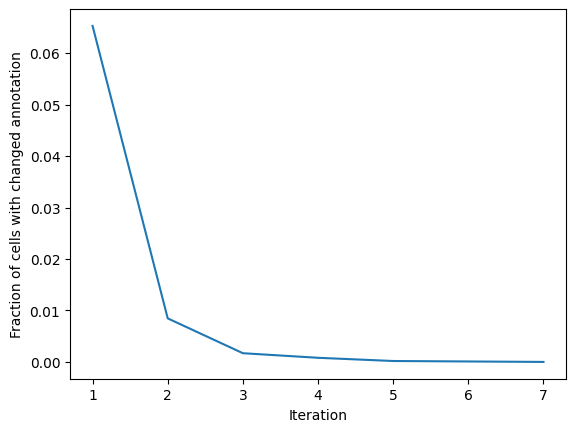

In [40]:
# Own score genes iterative with basic marker gene list updated with strategy 1 and 2
own_score_genes_iterative(sdata.table,path_mg_mod_1_2,nr_iterations=8)